In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from rfpimp import *
import category_encoders as ce

In [2]:
train = pd.read_csv('train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.head(3).T

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
Sex,male,female,female
Age,22.0,38.0,26.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,7.25,71.2833,7.925


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.nunique(axis=0, dropna=True)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
# train['Age'] = train['Age'].fillna(np.mean(train['Age']))
# train['Cabin'] = train['Cabin'].fillna('C00')
# train['Embarked'] = train['Embarked'].fillna('S')

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [9]:
numfeatures = ['Pclass','SibSp','Parch','Fare']

X = train[numfeatures]
y = train['Survived']


rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X, y)

oob_baseline = rf.oob_score_
print(f"Out-of-bag R^2 for baseline model is: {oob_baseline}")

Out-of-bag R^2 for baseline model is: 0.696969696969697


In [10]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pickle
pickle_out = open("rf.pkl","wb")
pickle.dump(rf,pickle_out)
pickle_out.close()

In [12]:
X.head() , y.head()

(   Pclass  SibSp  Parch     Fare
 0       3      1      0   7.2500
 1       1      1      0  71.2833
 2       3      0      0   7.9250
 3       1      1      0  53.1000
 4       3      0      0   8.0500,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [13]:
X.shape

(891, 4)

In [14]:
def evaluate(X, y):
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob = rf.oob_score_
    n = rfnnodes(rf)
    h = np.median(rfmaxdepths(rf))
    print(f"OOB R^2 is {oob:.5f} using {n:,d} tree nodes with {h} median tree depth")
    return rf, oob

In [15]:
def showimp(rf, X, y):
    features = list(X.columns)
#     features.remove('SibSp')
#     features.remove('Parch')
#     features += [['SibSp','Parch']]

    I = importances(rf, X, y, features=features)
    plot_importances(I, color='#4575b4')

In [16]:
evaluate(X, y)

OOB R^2 is 0.69024 using 31,738 tree nodes with 18.0 median tree depth


(RandomForestClassifier(n_jobs=-1, oob_score=True), 0.6902356902356902)

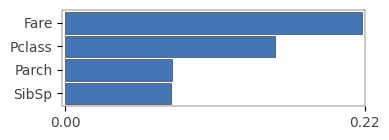

In [17]:
showimp(rf, X, y)

### An Ordinal Variable: 

In [18]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [19]:
X = train[numfeatures]
y = train['Survived']
X.head()

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


In [20]:
import category_encoders as ce

encoder = ce.OrdinalEncoder()

encoder.fit(X)
X = encoder.transform(X)
X.head()

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


In [21]:
rf, oob = evaluate(X, y)

OOB R^2 is 0.70932 using 31,650 tree nodes with 18.0 median tree depth


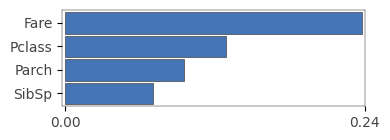

In [22]:
showimp(rf, X, y)

### A Nominal Variable:

In [23]:
len(train['PassengerId'].unique())

891

In [24]:
X = train[numfeatures + ['PassengerId']]
y = train['Survived']
X.head()

,Pclass,SibSp,Parch,Fare,PassengerId
0,3,1,0,7.2500,1
1,1,1,0,71.2833,2
2,3,0,0,7.9250,3
3,1,1,0,53.1000,4
4,3,0,0,8.0500,5


In [25]:
encoder = ce.OrdinalEncoder(cols=['PassengerId'])

encoder.fit(X)
X = encoder.transform(X)
X.head()

,Pclass,SibSp,Parch,Fare,PassengerId
0,3,1,0,7.2500,1
1,1,1,0,71.2833,2
2,3,0,0,7.9250,3
3,1,1,0,53.1000,4
4,3,0,0,8.0500,5


In [26]:
rf, oob = evaluate(X, y)

OOB R^2 is 0.67901 using 44,886 tree nodes with 22.0 median tree depth


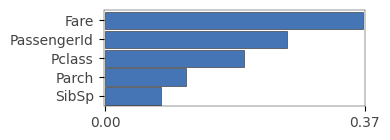

In [27]:
showimp(rf, X, y)

In [28]:
encoder = ce.CountEncoder(cols=['PassengerId'])

encoder.fit(X)
X = encoder.transform(X)
X.head()

,Pclass,SibSp,Parch,Fare,PassengerId
0,3,1,0,7.2500,1
1,1,1,0,71.2833,1
2,3,0,0,7.9250,1
3,1,1,0,53.1000,1
4,3,0,0,8.0500,1


In [29]:
rf, oob = evaluate(X, y)

OOB R^2 is 0.68799 using 32,082 tree nodes with 18.0 median tree depth


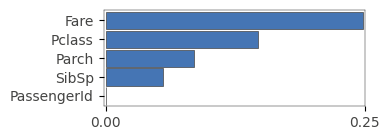

In [30]:
showimp(rf, X, y)

#### One-Hot Encoding

In [31]:
encoder = ce.OneHotEncoder(cols=['Sex'])

encoder.fit(train)
train = encoder.transform(train)
train

,PassengerId,Survived,Pclass,Name,Sex_1,Sex_2,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,0,26.0,0,0,111369,30.0000,C148,C
